In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['figure.dpi'] = 100

# Display confirmation
print("Essential libraries for EDA, preprocessing, modeling, and evaluation have been imported.")


Essential libraries for EDA, preprocessing, modeling, and evaluation have been imported.


In [3]:
df = pd.read_csv('autism_renamed.csv')

In [4]:
df.head()

,Age,Sex,Home_Language,Race,Hispanic_Ethnicity,Born_in_US,Poverty_Level,Family_Size,Adverse_Childhood_Exp,Parental_Education,...,Says_One_Word,Says_Two_Words,Asks_Questions,Screen_Time_Hours,Sleep_Hours,Maternal_Mental_Health,Neighborhood_Support,Parental_Aggravation,Family_Resilience,Autism_Diagnosis
0,11,0,0,1,1,0,266.0,3.0,2,2,...,0,0,0,4.0,1,2,3,1,2,0
1,14,1,0,0,0,0,400.0,4.0,0,3,...,0,0,0,5.0,0,0,1,1,2,0
2,17,1,1,0,0,0,190.0,5.0,0,1,...,0,0,0,4.0,0,2,1,1,2,0
3,12,1,0,0,0,0,142.0,4.0,0,2,...,0,0,0,4.0,0,0,2,1,2,0
4,10,1,0,3,1,0,101.0,4.0,0,1,...,0,0,0,5.0,0,2,3,0,2,0


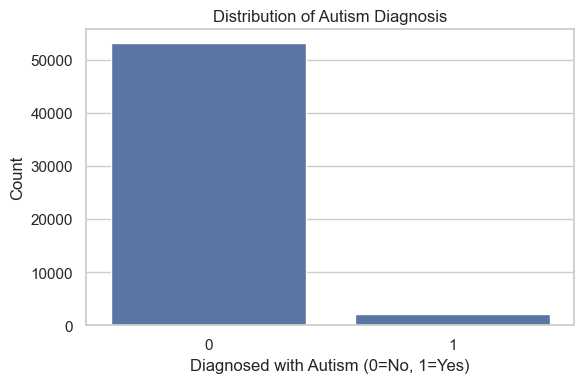

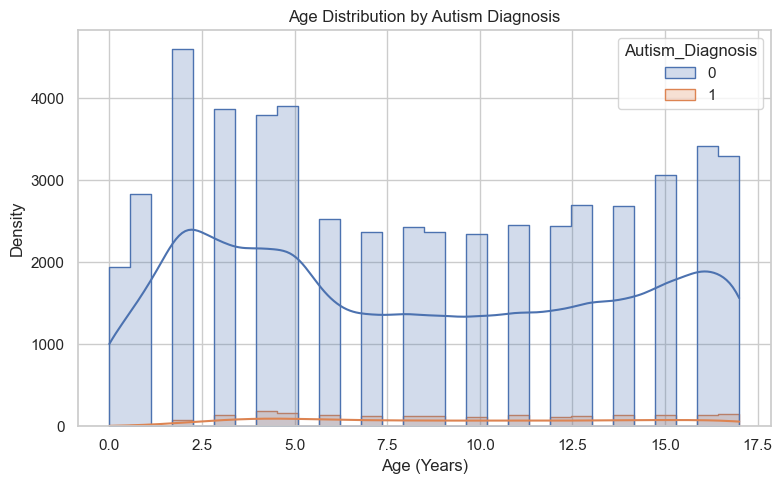

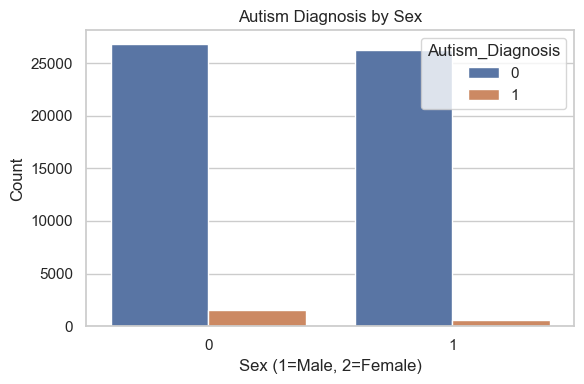

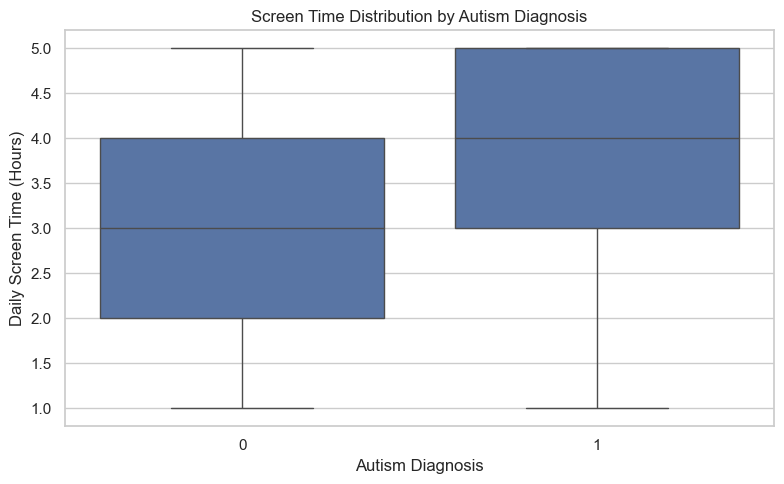

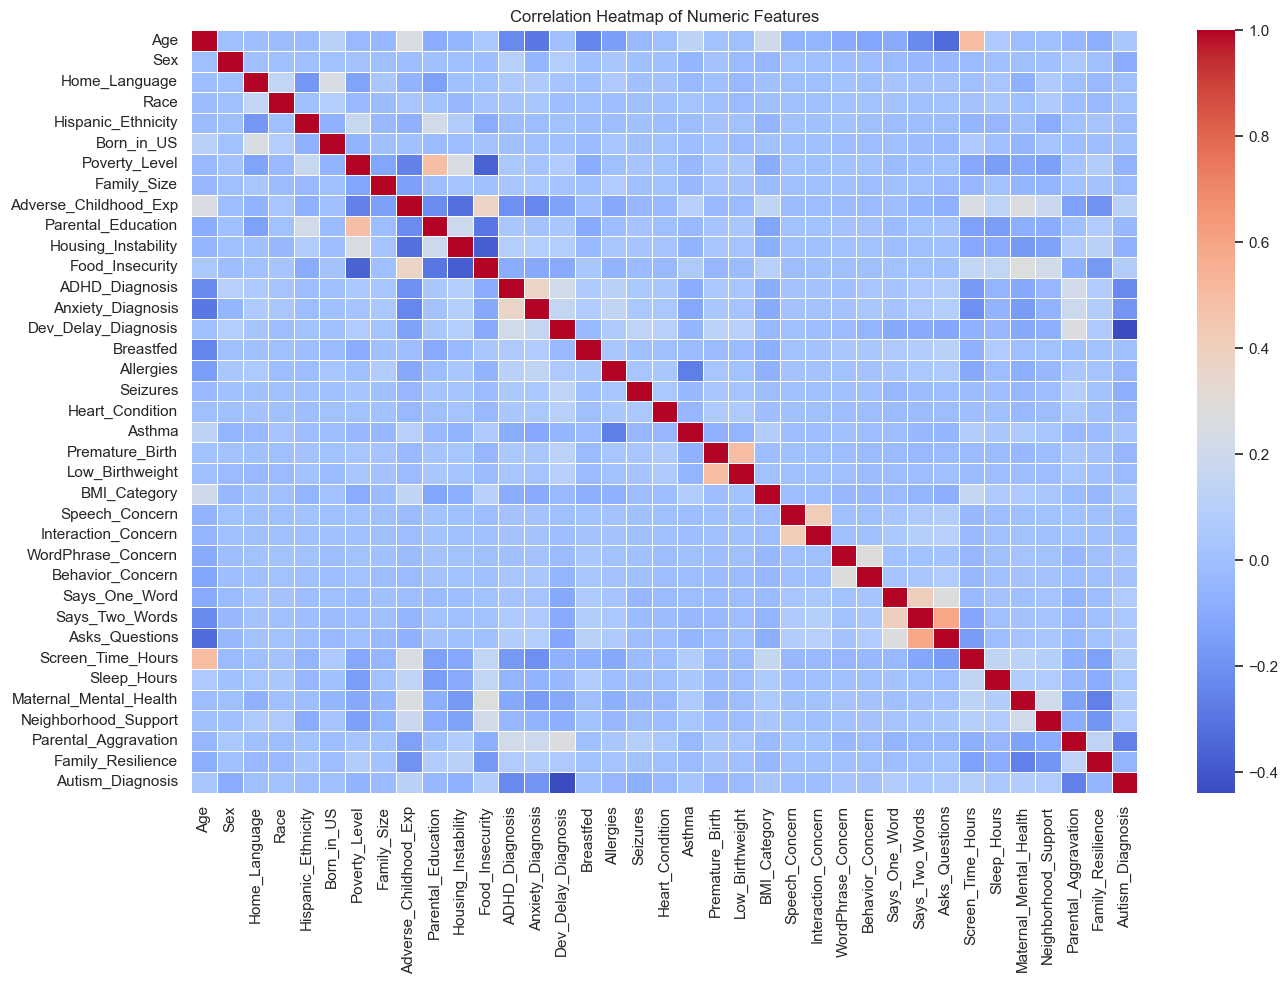

In [6]:
# --------------------------------------------
# 1. Imports and Setup
# --------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output directory
os.makedirs("eda_plots", exist_ok=True)
sns.set(style="whitegrid")

# --------------------------------------------
# 2. Target Variable Distribution
# --------------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Autism_Diagnosis')
plt.title("Distribution of Autism Diagnosis")
plt.xlabel("Diagnosed with Autism (0=No, 1=Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 3. Age Distribution by Autism Diagnosis
# --------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Autism_Diagnosis', kde=True, bins=30, element='step')
plt.title("Age Distribution by Autism Diagnosis")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 4. Autism Diagnosis by Sex
# --------------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Autism_Diagnosis')
plt.title("Autism Diagnosis by Sex")
plt.xlabel("Sex (1=Male, 2=Female)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 5. Screen Time vs Autism Diagnosis
# --------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Autism_Diagnosis', y='Screen_Time_Hours')
plt.title("Screen Time Distribution by Autism Diagnosis")
plt.xlabel("Autism Diagnosis")
plt.ylabel("Daily Screen Time (Hours)")
plt.tight_layout()
plt.show()

# --------------------------------------------
# 6. Correlation Heatmap (Numerical Features)
# --------------------------------------------
numeric_cols = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


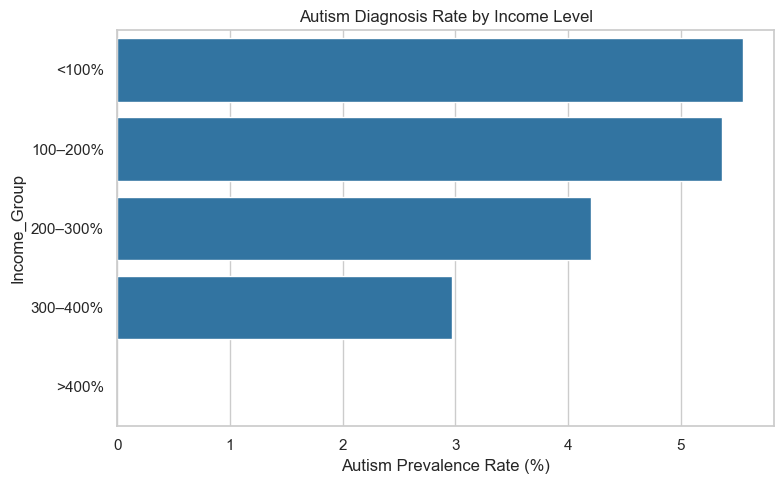

  Income_Group  total  autism_cases  autism_rate
0        <100%   6647           369         5.55
1     100–200%   8754           470         5.37
2     200–300%   8873           373         4.20
3     300–400%  30888           918         2.97
4        >400%      0             0          NaN


In [7]:
# Bin Poverty_Level into meaningful income groups
df['Income_Group'] = pd.cut(df['Poverty_Level'], bins=[0, 100, 200, 300, 400, 1000],
                            labels=['<100%', '100–200%', '200–300%', '300–400%', '>400%'])

econ = df.groupby('Income_Group')['Autism_Diagnosis'].agg(
    total='count',
    autism_cases='sum'
).reset_index()
econ['autism_rate'] = (econ['autism_cases'] / econ['total']) * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=econ, x='autism_rate', y='Income_Group', color='#1f77b4')
plt.xlabel("Autism Prevalence Rate (%)")
plt.title("Autism Diagnosis Rate by Income Level")
plt.tight_layout()
plt.show()

print(econ.round(2))


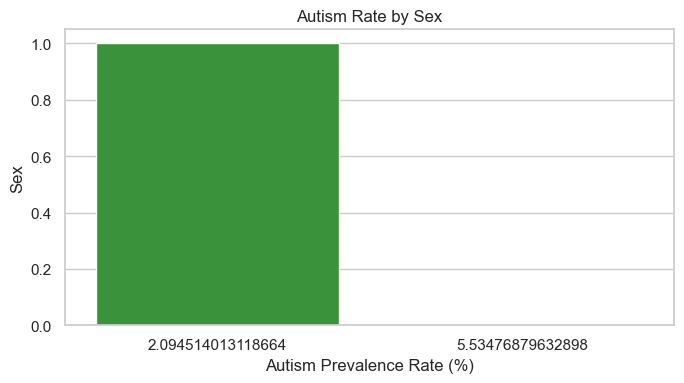


Autism Rate by Sex:

   Sex  total  autism_cases  autism_rate
0    0  28330          1568         5.53
1    1  26832           562         2.09


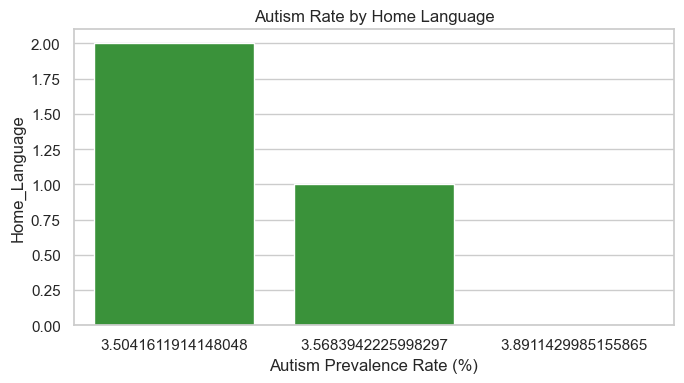


Autism Rate by Home Language:

   Home_Language  total  autism_cases  autism_rate
0              0  50525          1966         3.89
1              1   2354            84         3.57
2              2   2283            80         3.50


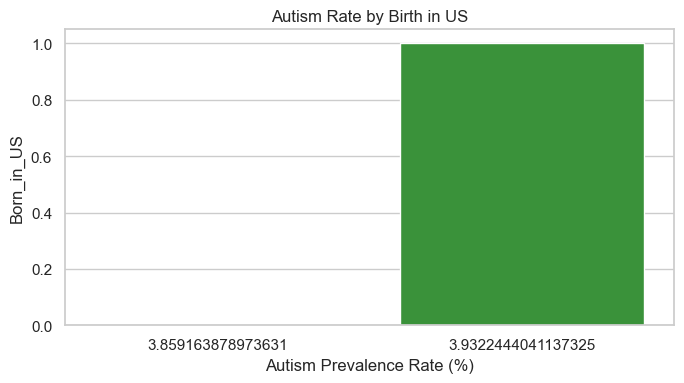


Autism Rate by Birth in US:

   Born_in_US  total  autism_cases  autism_rate
0           0  53509          2065         3.86
1           1   1653            65         3.93


In [8]:
# Function to plot autism prevalence by demographic category
def plot_demo_rate(colname, title):
    demo = df.groupby(colname)['Autism_Diagnosis'].agg(
        total='count',
        autism_cases='sum'
    ).reset_index()
    demo['autism_rate'] = (demo['autism_cases'] / demo['total']) * 100

    plt.figure(figsize=(7, 4))
    sns.barplot(data=demo, x='autism_rate', y=colname, color='#2ca02c')
    plt.xlabel("Autism Prevalence Rate (%)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print(f"\n{title}:\n")
    print(demo.round(2))

# Examples
plot_demo_rate('Sex', "Autism Rate by Sex")
plot_demo_rate('Home_Language', "Autism Rate by Home Language")
plot_demo_rate('Born_in_US', "Autism Rate by Birth in US")


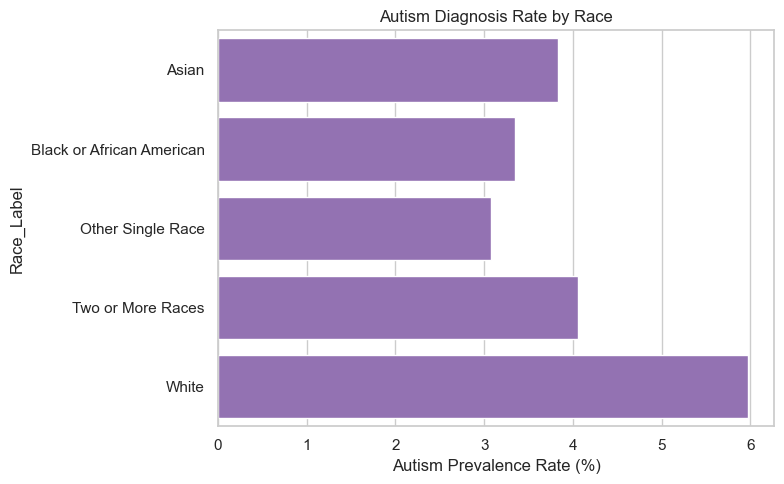

                  Race_Label  total  autism_cases  autism_rate
0                      Asian   3632           139         3.83
1  Black or African American    507            17         3.35
2          Other Single Race    260             8         3.08
3          Two or More Races   4982           202         4.05
4                      White   3686           220         5.97


In [9]:
# Map numeric race codes to names (adjust codes as needed)
race_map = {
    1: 'White',
    2: 'Black or African American',
    3: 'Asian',
    4: 'Other Single Race',
    5: 'Two or More Races',
    6: 'American Indian or Alaska Native'
}
df['Race_Label'] = df['Race'].map(race_map)

race = df.groupby('Race_Label')['Autism_Diagnosis'].agg(
    total='count',
    autism_cases='sum'
).reset_index()
race['autism_rate'] = (race['autism_cases'] / race['total']) * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=race, x='autism_rate', y='Race_Label', color='#9467bd')
plt.xlabel("Autism Prevalence Rate (%)")
plt.title("Autism Diagnosis Rate by Race")
plt.tight_layout()
plt.show()

print(race.round(2))


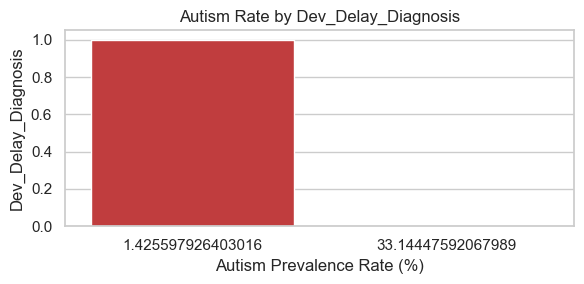


Dev_Delay_Diagnosis:

   Dev_Delay_Diagnosis  total  autism_cases  autism_rate
0                    0   4236          1404        33.14
1                    1  50926           726         1.43


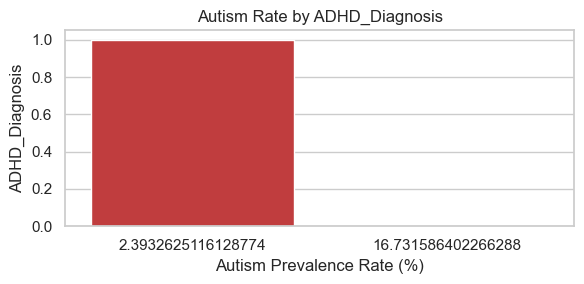


ADHD_Diagnosis:

   ADHD_Diagnosis  total  autism_cases  autism_rate
0               0   5648           945        16.73
1               1  49514          1185         2.39


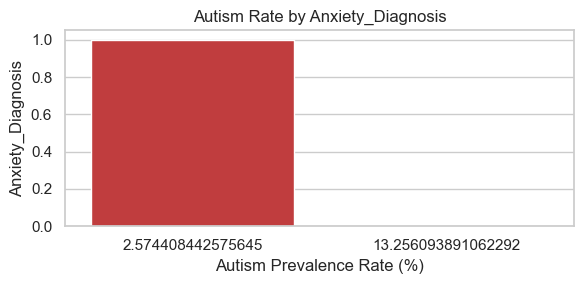


Anxiety_Diagnosis:

   Anxiety_Diagnosis  total  autism_cases  autism_rate
0                  0   6646           881        13.26
1                  1  48516          1249         2.57


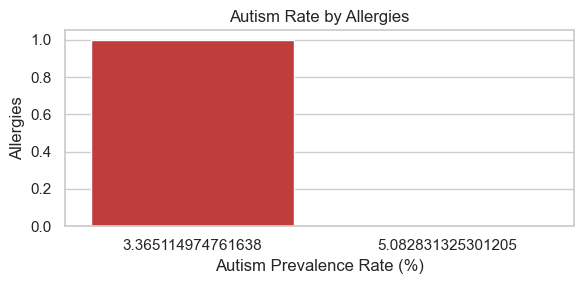


Allergies:

   Allergies  total  autism_cases  autism_rate
0          0  15936           810         5.08
1          1  39226          1320         3.37


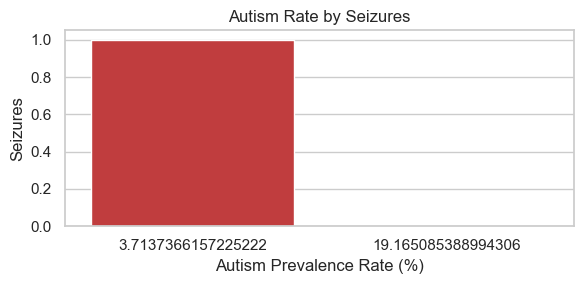


Seizures:

   Seizures  total  autism_cases  autism_rate
0         0    527           101        19.17
1         1  54635          2029         3.71


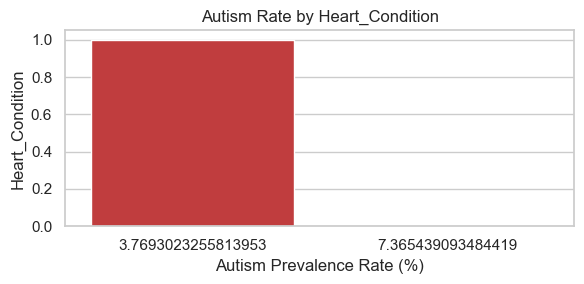


Heart_Condition:

   Heart_Condition  total  autism_cases  autism_rate
0                0   1412           104         7.37
1                1  53750          2026         3.77


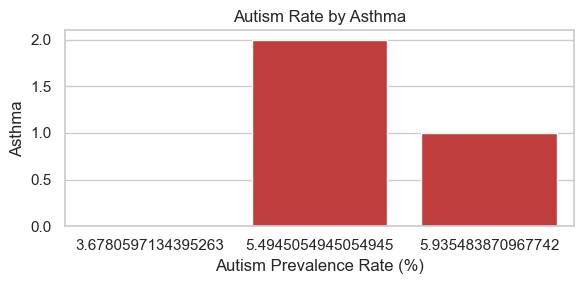


Asthma:

   Asthma  total  autism_cases  autism_rate
0       0  49972          1838         3.68
1       1   1550            92         5.94
2       2   3640           200         5.49


In [10]:
# Variables related to health
health_cols = ['Dev_Delay_Diagnosis', 'ADHD_Diagnosis', 'Anxiety_Diagnosis',
               'Allergies', 'Seizures', 'Heart_Condition', 'Asthma']

for var in health_cols:
    temp = df.groupby(var)['Autism_Diagnosis'].agg(
        total='count',
        autism_cases='sum'
    ).reset_index()
    temp['autism_rate'] = (temp['autism_cases'] / temp['total']) * 100

    plt.figure(figsize=(6, 3))
    sns.barplot(data=temp, x='autism_rate', y=var, color='#d62728')
    plt.xlabel("Autism Prevalence Rate (%)")
    plt.title(f"Autism Rate by {var}")
    plt.tight_layout()
    plt.show()

    print(f"\n{var}:\n")
    print(temp.round(2))


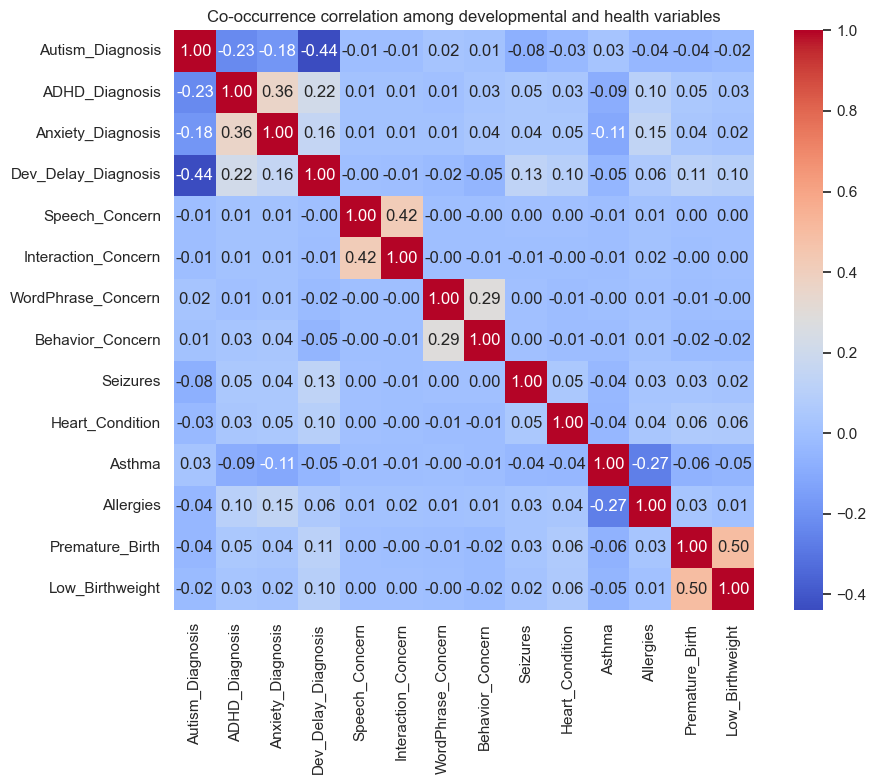

In [13]:
# A.1: Co-occurrence heatmap of autism and comorbid conditions

import seaborn as sns
import matplotlib.pyplot as plt

# List of binary health/developmental indicators
comorbid_vars = [
    'Autism_Diagnosis',
    'ADHD_Diagnosis',
    'Anxiety_Diagnosis',
    'Dev_Delay_Diagnosis',
    'Speech_Concern',
    'Interaction_Concern',
    'WordPhrase_Concern',
    'Behavior_Concern',
    'Seizures',
    'Heart_Condition',
    'Asthma',
    'Allergies',
    'Premature_Birth',
    'Low_Birthweight'
]

# Subset to only relevant columns
comorb_df = df[comorbid_vars]

# Create correlation matrix (Pearson by default)
corr_matrix = comorb_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Co-occurrence correlation among developmental and health variables")
plt.tight_layout()
plt.show()


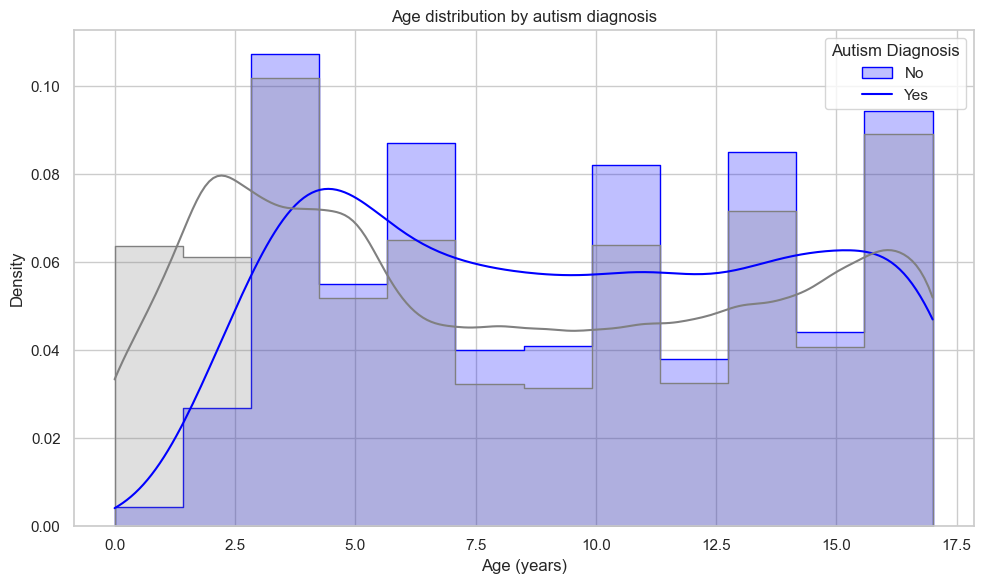

In [14]:
# A.2: Age distribution comparison by autism diagnosis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Autism_Diagnosis', bins=12, kde=True, palette=['gray', 'blue'], element='step', stat='density', common_norm=False)
plt.title('Age distribution by autism diagnosis')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend(title='Autism Diagnosis', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


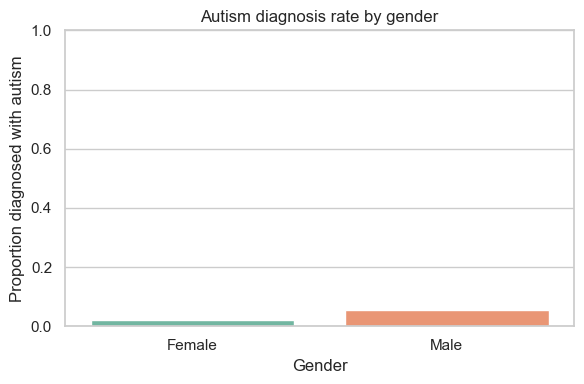

In [15]:
# A.3: Autism diagnosis rate by gender

import seaborn as sns
import matplotlib.pyplot as plt

# Map sex values to labels
sex_map = {0: 'Male', 1: 'Female'}
df['Sex_Label'] = df['Sex'].map(sex_map)

# Calculate proportion diagnosed within each gender
diagnosis_by_gender = df.groupby('Sex_Label')['Autism_Diagnosis'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=diagnosis_by_gender, x='Sex_Label', y='Autism_Diagnosis', palette='Set2')
plt.title('Autism diagnosis rate by gender')
plt.ylabel('Proportion diagnosed with autism')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


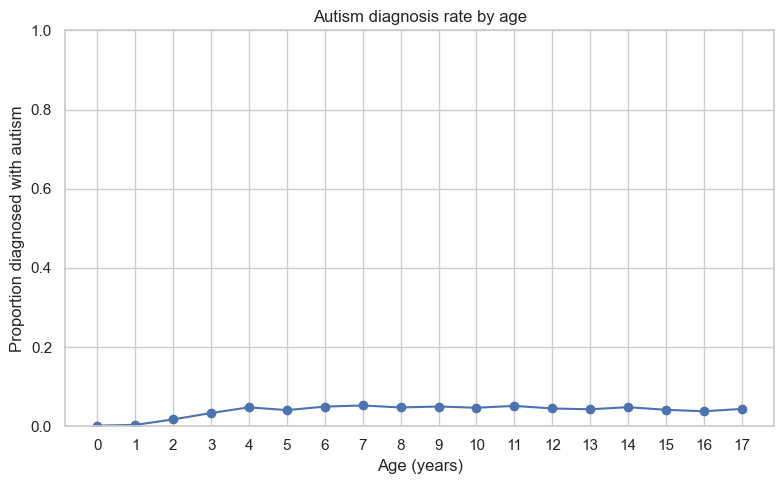

In [16]:
# A.4: Cumulative autism diagnosis rate by age

import matplotlib.pyplot as plt

# Group by age and calculate proportion diagnosed
diagnosis_by_age = df.groupby('Age')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
diagnosis_by_age.columns = ['Age', 'Diagnosis_Rate', 'Sample_Size']

plt.figure(figsize=(8, 5))
plt.plot(diagnosis_by_age['Age'], diagnosis_by_age['Diagnosis_Rate'], marker='o')
plt.title('Autism diagnosis rate by age')
plt.xlabel('Age (years)')
plt.ylabel('Proportion diagnosed with autism')
plt.grid(True)
plt.xticks(diagnosis_by_age['Age'].unique())
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


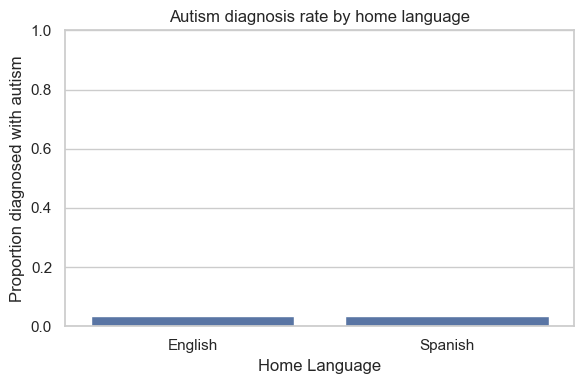

In [17]:
# A.5: Autism diagnosis rate by language spoken at home

# Map Home_Language values to readable labels if not already mapped
language_map = {
    1: 'English',
    2: 'Spanish',
    3: 'Other'
}
df['Home_Language_Label'] = df['Home_Language'].map(language_map)

# Group and calculate autism diagnosis rate per language group
language_diag = df.groupby('Home_Language_Label')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
language_diag.columns = ['Home_Language', 'Diagnosis_Rate', 'Sample_Size']

# Plot
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.barplot(data=language_diag, x='Home_Language', y='Diagnosis_Rate')
plt.title('Autism diagnosis rate by home language')
plt.ylabel('Proportion diagnosed with autism')
plt.xlabel('Home Language')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


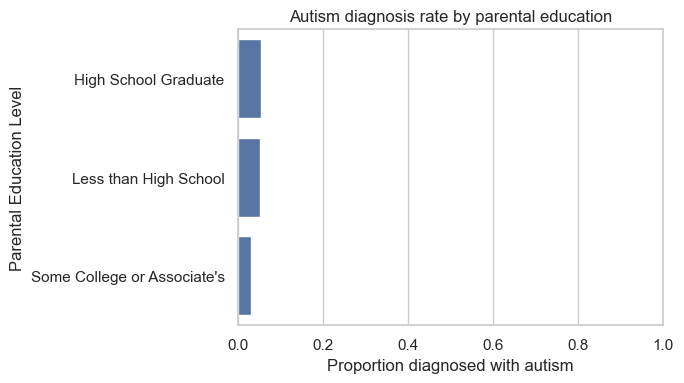

In [18]:
# A.6: Autism diagnosis rate by parental education level

# Map values to descriptive labels (based on codebook definitions)
education_map = {
    1: "Less than High School",
    2: "High School Graduate",
    3: "Some College or Associate's",
    4: "Bachelor's or Higher"
}
df['Parental_Education_Label'] = df['Parental_Education'].map(education_map)

# Group and compute diagnosis rate
edu_diag = df.groupby('Parental_Education_Label')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
edu_diag.columns = ['Parental_Education', 'Diagnosis_Rate', 'Sample_Size']

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(data=edu_diag, x='Diagnosis_Rate', y='Parental_Education')
plt.title('Autism diagnosis rate by parental education')
plt.xlabel('Proportion diagnosed with autism')
plt.ylabel('Parental Education Level')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


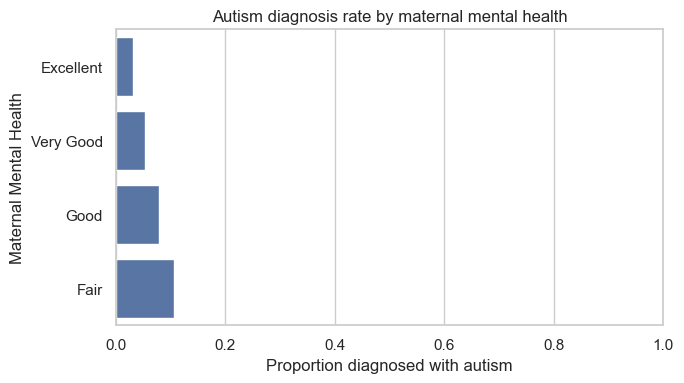

In [19]:
# A.7: Autism diagnosis rate by maternal mental health status

# Define mapping from values to labels using codebook
mental_health_map = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}
df['Maternal_Mental_Health_Label'] = df['Maternal_Mental_Health'].map(mental_health_map)

# Group by and compute diagnosis rate
mental_diag = df.groupby('Maternal_Mental_Health_Label')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
mental_diag.columns = ['Mental_Health_Status', 'Diagnosis_Rate', 'Sample_Size']

# Sort for better visual order (from Excellent to Poor)
mental_diag = mental_diag.loc[mental_diag['Mental_Health_Status'].isin(mental_health_map.values())]
mental_diag['Sort_Order'] = mental_diag['Mental_Health_Status'].map({v: i for i, v in enumerate(mental_health_map.values())})
mental_diag = mental_diag.sort_values('Sort_Order')

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(data=mental_diag, x='Diagnosis_Rate', y='Mental_Health_Status')
plt.title('Autism diagnosis rate by maternal mental health')
plt.xlabel('Proportion diagnosed with autism')
plt.ylabel('Maternal Mental Health')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


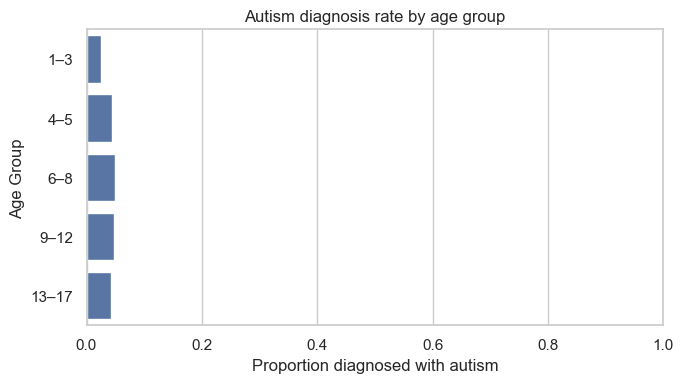

In [20]:
# A.8: Autism diagnosis rate by age group

# Define age bins
bins = [1, 3, 5, 8, 12, 18]
labels = ['1–3', '4–5', '6–8', '9–12', '13–17']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Group by age group
age_diag = df.groupby('Age_Group')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
age_diag.columns = ['Age_Group', 'Diagnosis_Rate', 'Sample_Size']

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(data=age_diag, x='Diagnosis_Rate', y='Age_Group', order=labels)
plt.title('Autism diagnosis rate by age group')
plt.xlabel('Proportion diagnosed with autism')
plt.ylabel('Age Group')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


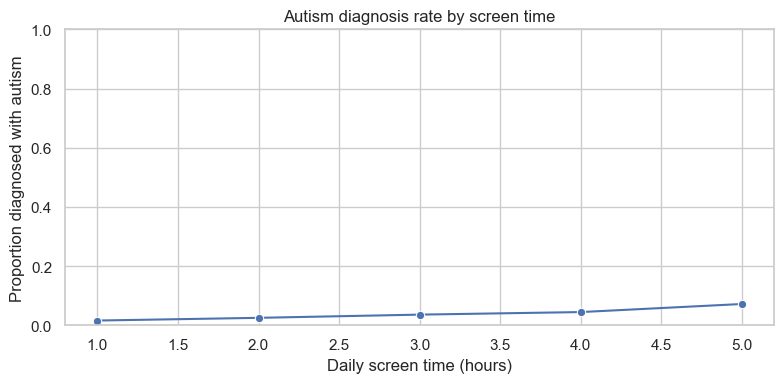

In [21]:
# A.9: Autism diagnosis rate by screen time hours

# Ensure screen time is numeric and within a reasonable range (e.g., 0–12 hours)
screen_df = df[(df['Screen_Time_Hours'] >= 0) & (df['Screen_Time_Hours'] <= 12)]

# Group and calculate diagnosis rate
screen_time_diag = screen_df.groupby('Screen_Time_Hours')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
screen_time_diag.columns = ['Screen_Time_Hours', 'Diagnosis_Rate', 'Sample_Size']

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=screen_time_diag, x='Screen_Time_Hours', y='Diagnosis_Rate', marker='o')
plt.title('Autism diagnosis rate by screen time')
plt.xlabel('Daily screen time (hours)')
plt.ylabel('Proportion diagnosed with autism')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


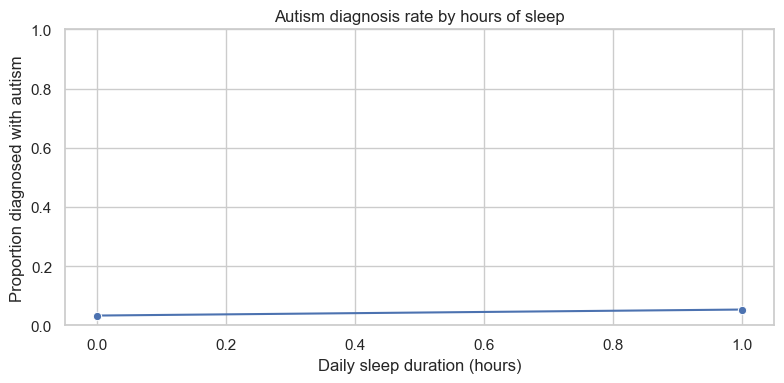

In [22]:
# A.10: Autism diagnosis rate by sleep hours

# Ensure sleep hours are within 0–15 range (based on age-appropriate sleep duration)
sleep_df = df[(df['Sleep_Hours'] >= 0) & (df['Sleep_Hours'] <= 15)]

# Group and compute diagnosis rates
sleep_diag = sleep_df.groupby('Sleep_Hours')['Autism_Diagnosis'].agg(['mean', 'count']).reset_index()
sleep_diag.columns = ['Sleep_Hours', 'Diagnosis_Rate', 'Sample_Size']

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=sleep_diag, x='Sleep_Hours', y='Diagnosis_Rate', marker='o')
plt.title('Autism diagnosis rate by hours of sleep')
plt.xlabel('Daily sleep duration (hours)')
plt.ylabel('Proportion diagnosed with autism')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


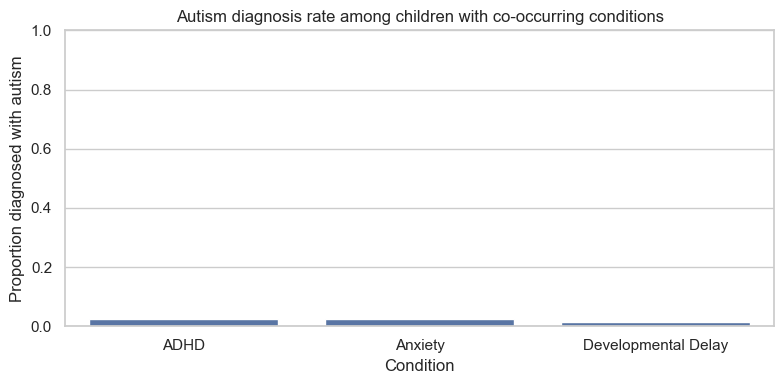

In [23]:
# A.11: Co-occurrence of other diagnoses with autism

# List of comorbid conditions
comorbid_vars = {
    'ADHD_Diagnosis': 'ADHD',
    'Anxiety_Diagnosis': 'Anxiety',
    'Dev_Delay_Diagnosis': 'Developmental Delay'
}

# Create a dataframe to collect results
co_diag_stats = []

# Calculate co-occurrence stats
for col, label in comorbid_vars.items():
    with_condition = df[df[col] == 1]
    autism_with_condition = with_condition['Autism_Diagnosis'].mean()
    prevalence = len(with_condition) / len(df)

    co_diag_stats.append({
        'Condition': label,
        'Autism_Rate': autism_with_condition,
        'Prevalence_in_Sample': prevalence
    })

co_diag_df = pd.DataFrame(co_diag_stats)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=co_diag_df, x='Condition', y='Autism_Rate')
plt.title('Autism diagnosis rate among children with co-occurring conditions')
plt.ylabel('Proportion diagnosed with autism')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


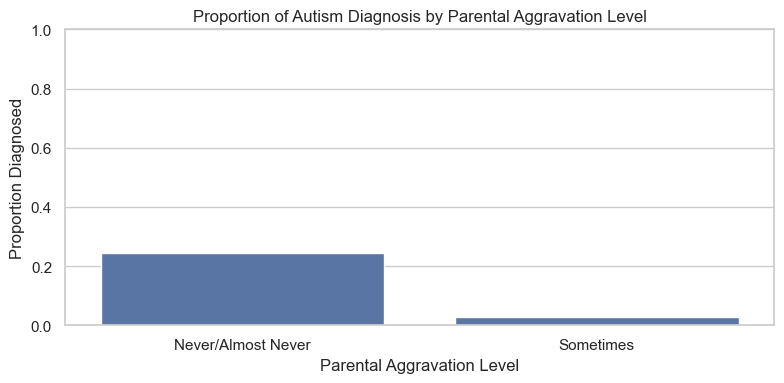

In [24]:
# A.12: Autism diagnosis by parental aggravation level

# Count of autism diagnosis by parental aggravation levels
par_stress_ct = df.groupby('Parental_Aggravation')['Autism_Diagnosis'].agg(['count', 'sum'])
par_stress_ct['Proportion_Diagnosed'] = par_stress_ct['sum'] / par_stress_ct['count']
par_stress_ct = par_stress_ct.reset_index()

# Label levels if known (replace with correct labels based on codebook if needed)
stress_labels = {
    0: 'Never/Almost Never',
    1: 'Sometimes',
    2: 'Usually/Always'
}
par_stress_ct['Parental_Aggravation_Label'] = par_stress_ct['Parental_Aggravation'].map(stress_labels)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=par_stress_ct, x='Parental_Aggravation_Label', y='Proportion_Diagnosed')
plt.title('Proportion of Autism Diagnosis by Parental Aggravation Level')
plt.ylabel('Proportion Diagnosed')
plt.xlabel('Parental Aggravation Level')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df.drop(columns=['Autism_Diagnosis'])
y = df['Autism_Diagnosis']

print("Step 1: Shape before processing")
print(f"Features (X): {X.shape}, Target (y): {y.shape}")

# Handle categorical features
cat_cols = X.select_dtypes(include=['object', 'category']).columns
print(f"\nStep 2: Categorical columns: {list(cat_cols)}")

for col in cat_cols:
    X[col] = X[col].astype(str).fillna('Missing')

# Handle numerical columns
num_cols = X.select_dtypes(include=['number']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("\nStep 3: Missing values after imputation")
print(X.isnull().sum().sort_values(ascending=False).head())

# Apply SMOTE to balance classes
print("\nStep 4: Class distribution before SMOTE")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nStep 5: Class distribution after SMOTE")
print(y_resampled.value_counts())

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"\nStep 6: Train and Test Split")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Step 1: Shape before processing
Features (X): (55162, 44), Target (y): (55162,)

Step 2: Categorical columns: ['Income_Group', 'Race_Label', 'Poverty_Level_Label', 'Sex_Label', 'Home_Language_Label', 'Parental_Education_Label', 'Maternal_Mental_Health_Label', 'Age_Group']

Step 3: Missing values after imputation
Age                    0
Sex                    0
Interaction_Concern    0
WordPhrase_Concern     0
Behavior_Concern       0
dtype: int64

Step 4: Class distribution before SMOTE
Autism_Diagnosis
0    53032
1     2130
Name: count, dtype: int64

Step 5: Class distribution after SMOTE
Autism_Diagnosis
0    53032
1    53032
Name: count, dtype: int64

Step 6: Train and Test Split
X_train: (84851, 44), X_test: (21213, 44)
y_train: (84851,), y_test: (21213,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Step 3: Predict
y_pred = logreg.predict(X_test_scaled)

# Step 4: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=2))


Confusion Matrix:
[[10108   499]
 [  523 10083]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10607
           1       0.95      0.95      0.95     10606

    accuracy                           0.95     21213
   macro avg       0.95      0.95      0.95     21213
weighted avg       0.95      0.95      0.95     21213



In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[10349   258]
 [  173 10433]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10607
           1       0.98      0.98      0.98     10606

    accuracy                           0.98     21213
   macro avg       0.98      0.98      0.98     21213
weighted avg       0.98      0.98      0.98     21213



In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
gbc = HistGradientBoostingClassifier(random_state=42)

# Train the model
gbc.fit(X_train, y_train)

# Predict
y_pred_gbc = gbc.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


Confusion Matrix:
[[10350   257]
 [  275 10331]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     10607
           1       0.98      0.97      0.97     10606

    accuracy                           0.97     21213
   macro avg       0.97      0.97      0.97     21213
weighted avg       0.97      0.97      0.97     21213



In [29]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix:
[[10422   185]
 [  267 10339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10607
           1       0.98      0.97      0.98     10606

    accuracy                           0.98     21213
   macro avg       0.98      0.98      0.98     21213
weighted avg       0.98      0.98      0.98     21213



In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))


Confusion Matrix:
[[ 9956   651]
 [  276 10330]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10607
           1       0.94      0.97      0.96     10606

    accuracy                           0.96     21213
   macro avg       0.96      0.96      0.96     21213
weighted avg       0.96      0.96      0.96     21213



In [31]:
import joblib
import json

# Replace `rf_model` and `scaler` with your actual variable names if they are different
joblib.dump(rf_model, 'model.pkl')          # Save trained Random Forest model
joblib.dump(scaler, 'scaler.pkl')           # Save the StandardScaler
with open('feature_columns.json', 'w') as f:
    json.dump(list(X_train.columns), f)     # Save feature column names (list)

print("✅ Model, scaler, and feature list saved.")


✅ Model, scaler, and feature list saved.
